# Will it rain tomorrow?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

В качестве второго датасета я выбрал "will it rain tomorrow", в котором собраны данные их различных австралийских метеостанций, такие как давление, скорость ветра, температура и так далее. Мне нужно построить и обучить модель бинарной классификации, которая бы предсказывала вероятность выпадения осадков завтра.  

В этом датасете есть следующие признаки:  
1.  Date: Дата наблюдения.
2.  Location: Название места расположения метеостанции.
3.  MinTemp Минимальная температура в градусах Цельсия.
4.  MaxTemp: Максимальная температура в градусах Цельсия.
5.  Rainfall: Количество осадков, зафиксированное за день в мм.
6.  Evaporation: Так называемое испарение класса А (мм) за 24 часа до 9 утра.
7.  Sunshine: Количество часов яркого солнечного света в день.
8.  WindGustDir: Направление самого сильного порыва ветра в 24 часах к полуночи.
9.  WindGustSpeed: Скорость (км/ч) самого сильного порыва ветра за 24 часа до полуночи.
10.  WindDir9am: Направление ветра в 9 утра.
11.  WindDir3p: Направление ветра в 3 вечера.
12.  WindSpeed9am: Скорость ветра (км/ч) в среднем за 10 минут до 9 утра.
13.  WindSpeed3pm: Скорость ветра (км/ч) в среднем за 10 минут до 3 часов вечера.
14.  Humidity9a: Влажность (в процентах) в 9 утра.
15.  Humidity3pm: Влажность (в процентах) в 3 часа.
16.  Pressure9am: Атмосферное давление (ММРС) снижено до среднего уровня моря на 9 утра.
17.  Pressure3pm: Атмосферное давление (ММРС) снижено до среднего уровня моря на 3 часа в минуту.
18.  Cloud9am: Доля неба, затуманенная облаком в 9 утра. Измеряется в "октах", которые представляют собой единицу высоты. Она записывает, сколько высот неба затемнено облаком. Измерение 0 указывает на абсолютно чистое небо, а 8 - на то, что оно полностью затуманено.
19.  Cloud3pm: Часть неба, затуманенная облаком (в "октах": восьмые) в 15:00. Описание значений см. в Cload9am.
20.  Temp9am: Температура (градусы цельсия) в 9 утра.
21.  Temp3pm: температура (градусы цельсия) в 3 часа дня.
22.  RainToday: Булевое значение, равное единице, если осадки (мм) в течение 24 часов до 9 утра превышает 1 мм, в противном случае 0.
23.  RISK_MM: Количество дождя на следующий день в мм. Используется для создания переменной реакции RainTomorrow. Своего рода мера "риска".

In [2]:
dataset=pd.read_csv('ausraindata.csv')
dataset.drop(['RISK_MM'], axis=1, inplace=True) # в описании датасета говорилось, что нужно убрать этот параметр.
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Спазу видим, что этот датасет не так хорошо подготовлен, как предидущий, тут присутствуют NaN значения и 'No', 'Yes', вместо 0 и 1. Я специально искал датасет, с которым нужно провести в том числе и подготовительную работу.

Посмотрим на названия всех параметров.

In [3]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [5]:
dataset.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

Видим, что в данных присутстуют пропуски, ниже будем их устранять.

## Подготовка данных

### Устранение пропусков

Для начала разделим призкаки на численные и котегореальные:

In [6]:
categorical = [i for i in dataset.columns if dataset[i].dtype == 'O']
numerical = [i for i in dataset.columns if dataset[i].dtype != 'O']
categoricalDF = pd.DataFrame(categorical)
numericalDF = pd.DataFrame(numerical)
print(f'У нас есть {len(categorical)} категориальных признаков:\n', categoricalDF)
print(f'\nИ {len(numerical)} численных признаков:\n', numericalDF)

У нас есть 7 категориальных признаков:
               0
0          Date
1      Location
2   WindGustDir
3    WindDir9am
4    WindDir3pm
5     RainToday
6  RainTomorrow

И 16 численных признаков:
                 0
0         MinTemp
1         MaxTemp
2        Rainfall
3     Evaporation
4        Sunshine
5   WindGustSpeed
6    WindSpeed9am
7    WindSpeed3pm
8     Humidity9am
9     Humidity3pm
10    Pressure9am
11    Pressure3pm
12       Cloud9am
13       Cloud3pm
14        Temp9am
15        Temp3pm


В категориальных признаках пропущены:

In [7]:
categoricalMissedVal = categoricalDF[list(dataset[categorical].isnull().sum() != 0)].transpose().values.tolist()[0]
categoricalMissedVal

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [8]:
for i in categoricalMissedVal:
    dataset[i].fillna(method = 'bfill', inplace=True)
dataset[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

#### Теперь последовательно разберемся с каждым признаком

Разбираемся с датой

In [9]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Year'] = dataset['Date'].dt.year
dataset['Month'] = dataset['Date'].dt.month
dataset['Day'] = dataset['Date'].dt.day
dataset.drop('Date', axis=1, inplace = True)
dataset.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [10]:
dataset.Year.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2007])

ОК, у нас данные за несколько лет, по этому в днном поле есть смысл.

In [19]:
categorical.remove('Date')

In [28]:
for i in categorical:
    print(f'{dataset[i].value_counts()},', 'Unique values:', len(dataset[i].unique()), '\n\n')

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cobar               2988
Cairns              2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


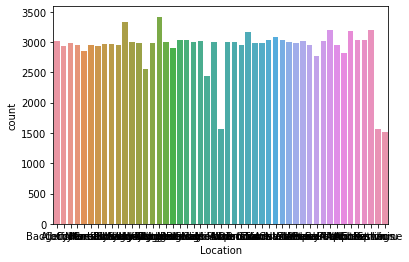

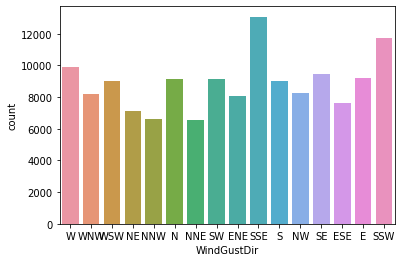

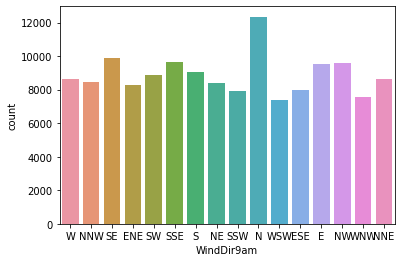

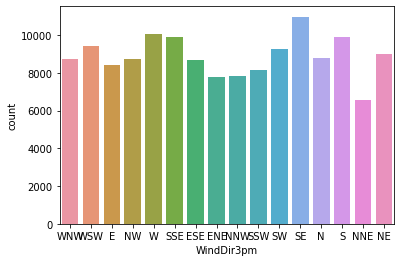

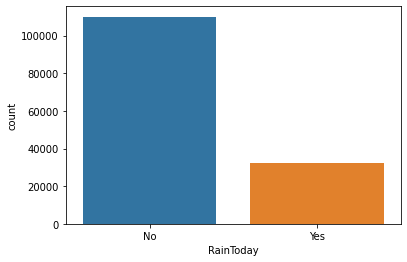

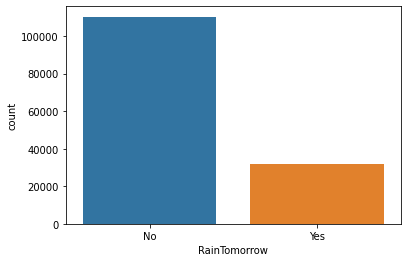

In [24]:
for i in categorical:
    sns.countplot(x=i, data=dataset)
    plt.show()